# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre: Alexys Martín Coate Reyes**

### **Matrícula: A01746998**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al. de ELSEVIER, que deberás descargar para contestar varias de las preguntas de esta actividad (el acceso es sin costo alguno):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [174]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings('ignore')

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



Las curvas de aprendizaje o "Learning Curves" nos sirven para entender si el modelo esta sobre entrenado (over-fitting) o subentrenado (under-fitting) o una combinación de ambas cosas por medio de la comparación de las métricas de evaluación como el error, accuracy, entre otros, en el conjunto de entrenamiento y prueba (train y test), en relación al tamaño tamaño conjunto de datos o ciclos de entrenamiento.

Esto nos va a permitir evaluar el desempeño del modelo al ir variando los ciclos de entrenamiento y/o el tamaño del conjunto de datos de entrenamiento y validación.

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al. de ELSEVIER, contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


El objetivo del articulo es desarrollar un modelo que pueda predecir el impacto de los posts de redes sociales por medio de sus características, con el propósito de poder dar soporte a la toma de desiciones de los managers.

Dicho modelo nos ayudará a establecer una relación causal para identificar dentificar las métricas que de desempeño en redes sociales con contribuyan más en la construcción y reconocimiento de la marca por parte de los usuarios o clientes.


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**


Se trabajarán con un total de 8 variables las cuales son: 'Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos', descritas en la siguinete tabla.

| Variable | Definición |
|----------|----------|
| Page total likes    | Número de personas a las que les ha gustado la página de la empresa.   |
| Type   | Tipo de contenido (Enlace, Foto, Estado, Vídeo)   |
| Category    | Caracterización manual de contenidos: acción (ofertas especiales y concursos), producto (publicidad directa, contenido explícito de marca) e inspiración (contenido no explícito relacionado con la marca).   |
| Post Month   | Mes en que se publicó la publicación (enero, febrero, marzo,…, diciembre)  |
| Post Weekday    | Día de la semana en que se publicó el post (domingo, lunes,…, sábado)   |
| Paid    | Si la empresa pagó a Facebook por publicidad (sí, no)   |
| horas_sin    | Artibuto que expresa la característica de la función seno de la variable "Post Hour" que representa el tiempo en el que se publico el post en el siguiente formato: (0, 1, 2, 3, 4, …, 23). Este atributo se obteiene por la siguiente fórmula y es fruto de la ingeniería de características:   $Tsin = sin(2*\pi*T/M)$ |
| horas_cos    | Artibuto que expresa la característica de la función coseno de la variable "Post Hour" que representa el tiempo en el que se publico el post en el siguiente formato: (0, 1, 2, 3, 4, …, 23). Este atributo se obteiene por la siguiente fórmula y es fruto de la ingeniería de características: $Tcos = cos(2*\pi*T/M)$   |



### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [175]:
# Cargamos los datos del archivo:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')
print('Total de registros y variables:',data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Ejercicio 3**

### **Variables temporales**

### **Recordemos que las varaibles temporales pueden tratarse como variables categóricas o numéricas, dependiendo del contexto. En nuestro caso las variables mes, día de la semana y hora en que se puso el post, podríamos considerarlas como variables categóricas ordinales. Sin embargo, para recordar cómo se transforman en cada uno de estos casos (numéricas y categóricas), consideraremos las variables de mes y día de la semana como categóricas ordinales y la variable hora como una variable cíclica.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable Post_hour está etiquetada de 0 a 23, por lo que las 24 horas serían las 0 horas, es decir tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. Así, las 24 horas será equivalente a las 0 horas**

### **La manera de transformar una variable T cíclica módulo M, es sustituyendo la columna original de la variable T por las siguientes dos columnas. Es lo que se llama ingeniería de características (feature engineering) dentro del área de ciencia de datos:**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### NOTA: Donde se indica None, podrás agregar las líneas de código que consideres necesarias.

In [176]:
# Ejercicio 3a:

# Define las dos nuevas variables, "horas_sin" y "horas_cos" a partir de la
# variable "Post Hour" y de acuerdo a como se indicó previamente:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++
import math
import numpy as np

# Se obtienen la parte seno y coseno de la variable "post_hour" utilizanndo una trnasformación de ingeniería de características
horas_sin = np.sin(2*np.pi*data['Post Hour']/24)
horas_cos = np.cos(2*np.pi*data['Post Hour']/24)

# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [177]:
# Ejercicio 3b:

# Agrega estas dos nuevas variables al DataFrame de tus datos
# y elimina la columna de la variable original "Post Hour":

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

data2 = pd.concat([data, pd.DataFrame({'horas_sin': horas_sin, 'horas_cos': horas_cos})], axis=1)
data2 = data2.drop(columns=['Post Hour'])

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


# Veamos lo que tenemos hasta el momento:
data2.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113


In [178]:
# De las Tablas 2 y 3 del artículo de ELSEVIER seleccionamos las variables que
# trabajaremos en esta Actividad.

# Separamos los datos de entrada (ver Tabla 3 del artículo) y de la variable de salida (ver Tabla 2):
X = data2[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos']]
y = data2[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de ELSEVIER.


# Particionamos en Train, Validation y Test en 70-15-15:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=7)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (350, 8) (350, 1)
Val: (75, 8) (75, 1)
Test: (75, 8) (75, 1)


In [179]:
Xtrain.describe(include='all').T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                                   # En particular, las desviaciones estándar (std) desplegadas son las muestrales.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,350.0,NaN,NaN,NaN,123412.534286,16145.534825,81370.0,111972.0,129600.0,136393.0,139441.0
Type,350,4,Photo,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,350.0,NaN,NaN,NaN,1.9,0.862295,1.0,1.0,2.0,3.0,3.0
Post Month,350.0,NaN,NaN,NaN,7.088571,3.309383,1.0,4.0,7.0,10.0,12.0
Post Weekday,350.0,NaN,NaN,NaN,4.151429,2.047414,1.0,2.0,4.0,6.0,7.0
Paid,349.0,NaN,NaN,NaN,0.286533,0.452791,0.0,0.0,0.0,1.0,1.0
horas_sin,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0
horas_cos,350.0,NaN,NaN,NaN,-0.191939,0.75209,-1.0,-0.866025,-0.5,0.707107,0.965926


### **Ajuste variable categórica en Pipeline**

#### **Veamos un ejemplo de cómo ajustar una variable categórica en la cual uno de sus niveles no tiene suficiente información, por ejemplo, que no tenga al menos un 5% de información cada nivel. Entonces reagruparemos los niveles más pequeños hasta obtener un 5% y esto mediante una función que podamos usar dentro del Pipeline, para evitar el filtrado de información.**

In [180]:
# Obtengamos las etiquetas únicas de data['Type'] ordenadas de mayor a menor frecuencia:
Xtrain['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [181]:
Xtrain['Type'].value_counts() / Xtrain.shape[0]   # Siguiendo la política de que cada nivel de una variable tenga
                                                  # al menos el 5% de información, agruparemos los casos "Link"
                                                  # y "Video" en un nuevo nivel que podría interpretarse como "Otros".

,count
Type,
Photo,0.860000
Status,0.082857
Link,0.045714
Video,0.011429


In [182]:
# Definimos la función que llevará a cabo esta transformación dentro del Pipeline:

def mi_type(x):
  x = x.values.ravel()  # Convertimos a un arreglo 1D
  x = pd.Series(x, name='Type')  # seleccionamos la columna como datos tipo Series
  x.loc[:] = x.map({'Photo':1, 'Status':2, 'Link':0, 'Video':0})  # Podrías etiquetarlos también como 3, en lugar de 0.
  return x.values.reshape(-1, 1)    # Ajustamos la dimensión a un vector columna.

### **Transformación en la Variable de Salida**



In [183]:
ytrain.describe().T   # Información de la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,350.0,780.517143,770.963085,9.0,336.75,543.0,959.0,5934.0


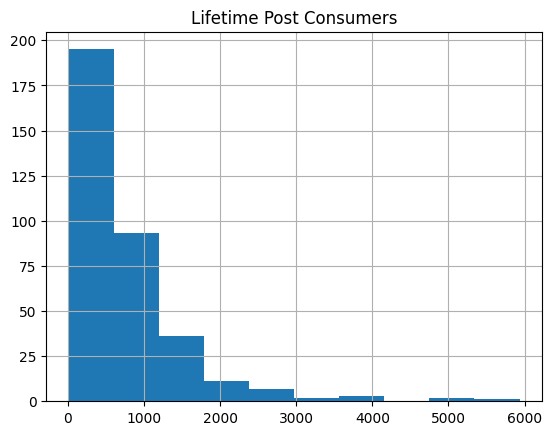

In [184]:
# Observamos a continuación que hay un claro sesgo positivo en la variable de salida:
ytrain.hist();

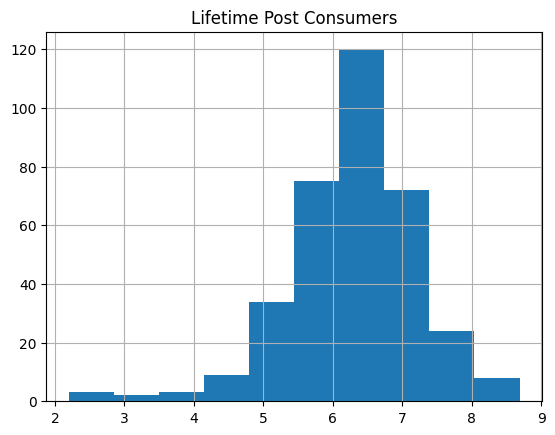

In [185]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [186]:
# Para una primera aproximación, podemos decir que se ajusta de manera aceptable
# la distribución con logaritmo a una acampanada.
# Procedemos entonces de la misma manera con Val y Test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [187]:
# Aplicaremos lo mínimo de transformaciones.
# Las nuevas variables horas_sin y horas_cos ya están escaladas entre -1 y +1, por
# lo que podemos dejarlas así y solamente cuidar sus posibles datos perdidos.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = [0]   # ['Page total likes']  puedes indicar solamente el índice de la columna.


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4]   # ['Post Month', 'Post Weekday']


# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [('catMap', FunctionTransformer(mi_type))])
catMap_pipe_nombres = ['Type']


# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,5]  # ['Type', 'Category', 'Paid']


# Variables numéricas con la hora:
hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = [6,7]   # ['horas_sin', 'horas_cos']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')



# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:
XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (350, 8)
Variables de entrada transformadas: (350, 12)


### **Criterio para determinar si un modelo está subentrenado en un problema de Regresión:**

In [188]:
# Existen varios criterios para determinar si un modelo de regresión está
# subentrenado, veamos a continuación unos de ellos.

# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))        # Usemos la desviación estándar muestral
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))    # ajustando los grados de libertad.

Desv-Est y-original: 770.963
Desv-Est y-logaritmo: 0.916


#### **Recordemos que la desviación estándar está en las mismas unidades de la variable original, por lo que en este caso tendríamos que la desviación estándar nos habla de aproximadamente 771 personas que dieron click en alguna parte del post.**

#### **En esta activiad estaremos comparando los errores en términos del logaritmo de la variable de salida, por lo que nuestro valor de referencia será el valor que obtienes en Desv_Est y_logaritmo=0.916 (aproximadamente). Así, los errores RMSE de los valores de predicción y los reales de los modelos que estarás obteniendo, deberán ser menores a este valor para no considerarlos subentrenados.**

#### **NOTA sobre los grados de libertad ddof (delta degree of freedom):**

Ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.std.html

#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [189]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainvallog = pd.concat([ytrainlog, yvallog], axis=0)

## **Ejercicio 4**


In [190]:

# Función para realizar Cross validation random y grid para encontrar los mejores hiperparámetros
def RandomizedCrossVal(Xtrain, ytrain, modelo, param_grid, cv=5, scoring='neg_mean_squared_error', SearchCV="random"):

  # Realiza la transformación de los datos y posteriormente lo ingresa al modelo
  mi_pipeline = Pipeline(steps=[('ct',columnasTransformer),('m', modelo)])

  # Create a GridSearchCV object
  if SearchCV == "grid":
    cross_val_search = GridSearchCV(mi_pipeline,
                            param_grid=param_grid,
                            cv=cv,
                            scoring=scoring,
                            n_jobs=-1)
  elif SearchCV == "random":
    cross_val_search = RandomizedSearchCV(mi_pipeline,
                              param_distributions=param_grid,
                              cv=cv,
                              scoring=scoring,
                              n_jobs=-1)

  # Fit the grid search to the data
  cross_val_search.fit(Xtrain, ytrain)

  # Get the best hyperparameters
  best_params = cross_val_search.best_params_
  best_score = cross_val_search.best_score_

  return modelo, best_params, best_score

In [191]:
# Función para dibujar la curva de aprendizaje de acuerdo al mejor modelo encontrado

def plotLearningCurve(modelo, X, y, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)):

  mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', modelo)])

  train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                          X=X,
                                                          y=np.ravel(y),
                                                          cv=5,
                                                          train_sizes= train_sizes,
                                                          scoring= scoring,  # error MSE
                                                          n_jobs=-1)

  # Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
  # como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
  # sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

  rmse_train_scores = np.sqrt(-train_scores)
  rmse_val_scores = np.sqrt(-val_scores)

  train_mean = np.mean(rmse_train_scores, axis=1)
  train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
  val_mean = np.mean(rmse_val_scores, axis=1)
  val_std = np.std(rmse_val_scores, axis=1, ddof=1)


  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

  plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

  plt.title('Curvas de Aprendizaje (Learning Curves) - ' + str(type(modelo).__name__))
  plt.xlabel('Tamaño de la muestra de entrenamiento')
  plt.ylabel('Error RMSE')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

# plotLearningCurve(mipipe, Xtrainval, ytrainvallog, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

Best Parameters: {'n_estimators': 75, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
Best Score: -0.5477084158709671


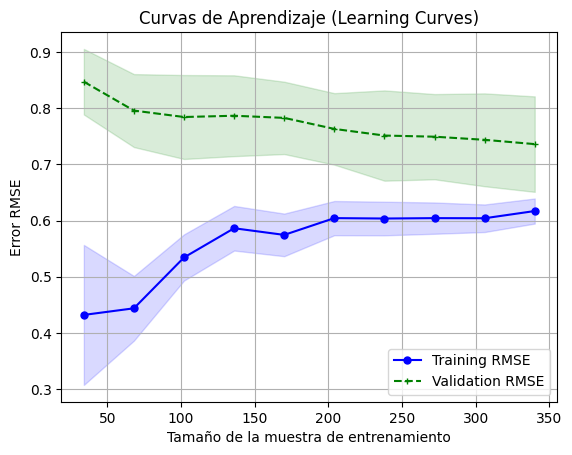

In [192]:
# Ejercicio 4a.

# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV


elmodelo_RF = RandomForestRegressor(random_state=1)

# Define the parameter grid to search
# Update the param_grid keys with 'm__' prefix
param_grid = {
    'm__n_estimators': [10, 50, 75, 100, 125],
    'm__max_depth': [1, 3, 5, 10, 20],
    'm__min_samples_split': [1.5, 2, 4, 6],
    'm__min_samples_leaf': [1, 2, 3, 4, 5],

    'm__max_features': ["sqrt","log2"]
}


elmodelo_RF, best_params, best_score = RandomizedCrossVal(Xtrainval, ytrainvallog, elmodelo_RF, param_grid, cv=5,
                                             scoring='neg_mean_squared_error', SearchCV="random")
# Corrigiendo los nombres de los parametros
best_params = {key.replace('m__',''): valor for key in best_params.keys() for valor in best_params.values() if best_params[key] == valor}

print("Best Parameters:", best_params)
print("Best Score:", best_score)


# Update the model with the best hyperparameters
# Access nested parameters using double underscore notation
elmodelo_RF = RandomForestRegressor(random_state=1, **best_params)


# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best Score: -0.5407694879695859


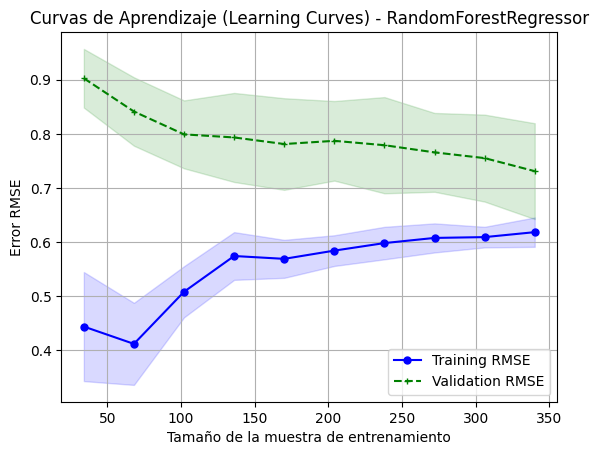

In [193]:
# Obtenido utilizando grid_search
RandomForest_best_params = {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
RandomForest_best_score = -0.5407694879695859

print("Best Parameters:", RandomForest_best_params)
print("Best Score:", RandomForest_best_score)

# Graficando curva de aprendizaje con el mejor modelo
elmodelo_RF = RandomForestRegressor(random_state=1, **RandomForest_best_params)
plotLearningCurve(elmodelo_RF, Xtrainval, ytrainvallog, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

In [212]:
# Ejercicio 4b.

# Una vez que verifiques que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


elmodelo_RF = RandomForestRegressor(random_state=1, **RandomForest_best_params)



# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.697


## **Ejercicio 5**

### **Repite el mismo proceso del Ejercicio 4 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenados, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [195]:
# Extreme Gradient Boost XGBoost
#!pip install XGBRegressor
from xgboost import XGBRegressor

nombre = "XG_Boosting"
XGB_model = XGBRegressor(random_state=1)

param_grid = {
    'm__n_estimators': [10, 50, 75, 100, 125],
    'm__max_depth': [1, 3, 5, 10, 20],
    'm__learning_rate': [0.1, 0.3, 0.7, 1, 3, 5],
    'm__eval_metric': ["logloss"],
}

XGB_model, best_params, best_score = RandomizedCrossVal(Xtrainval, ytrainvallog, XGB_model, param_grid, cv=5,
                                             scoring='neg_mean_squared_error', SearchCV="random")

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'m__n_estimators': 75, 'm__max_depth': 1, 'm__learning_rate': 0.3, 'm__eval_metric': 'logloss'}
Best Score: -0.5414591908454895


Best Parameters: {'eval_metric': 'logloss', 'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
Best Score: -0.544247412814501


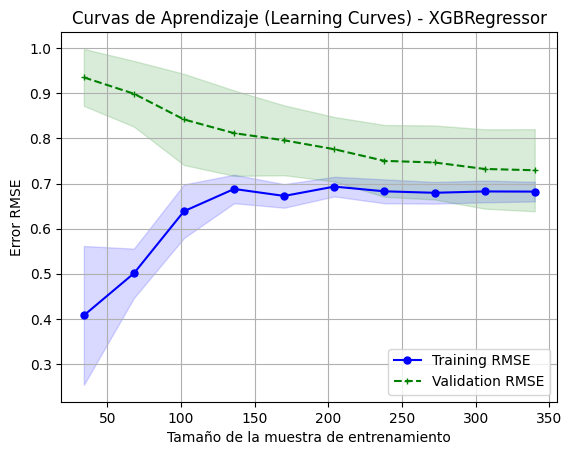

Error RSME(Test) de Random Forest: 0.694


In [213]:
# Obtenido utilizando grid_search
best_params = {'m__eval_metric': 'logloss', 'm__learning_rate': 0.3, 'm__max_depth': 1, 'm__n_estimators': 50}
XGB_best_params = {key.replace('m__',''): valor for key in best_params.keys() for valor in best_params.values() if best_params[key] == valor}
XGB_best_score = -0.544247412814501

print("Best Parameters:", XGB_best_params)
print("Best Score:", XGB_best_score)

# Graficando curva de aprendizaje con el mejor modelo
XGB_model = XGBRegressor(random_state=1, **XGB_best_params)
plotLearningCurve(XGB_model, Xtrainval, ytrainvallog, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

In [197]:
# Máquina de Vector Soporte SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

from sklearn.svm import SVR

nombre = "SVM"
SVM_model = SVR()

param_grid = {
    'm__C': [0.1, 0.5, 1, 5, 10],
    'm__degree': [1, 3, 6, 9],
    'm__tol': [0.1, 0.5, 1, 3],
    'm__kernel': ["linear", "poly", "rbf", "sigmoid", "precomputed"],
}

SVM_model, best_params, best_score = RandomizedCrossVal(Xtrainval, ytrainvallog, SVM_model, param_grid, cv=5,
                                             scoring='neg_mean_squared_error',  SearchCV="random")

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'m__tol': 3, 'm__kernel': 'linear', 'm__degree': 6, 'm__C': 10}
Best Score: -0.7199722840852485


Best Parameters: {'C': 10, 'degree': 1, 'kernel': 'rbf', 'tol': 0.1}
Best Score: -0.544247412814501


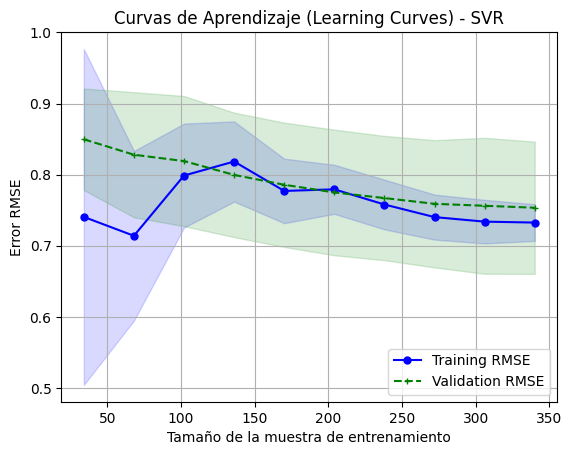

In [198]:
# Obtenido utilizando grid_search
best_params = {'m__C': 10, 'm__degree': 1, 'm__kernel': 'rbf', 'm__tol': 0.1}
SVC_best_params = {key.replace('m__',''): valor for key in best_params.keys() for valor in best_params.values() if best_params[key] == valor}
SVC_best_score = -0.544247412814501

print("Best Parameters:", SVC_best_params)
print("Best Score:", SVC_best_score)


# Graficando curva de aprendizaje con el mejor modelo
SVC_model = SVR(**SVC_best_params)
plotLearningCurve(SVM_model, Xtrainval, ytrainvallog, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

In [199]:
# Red Neuronal Perceptrón Multicapa MLP

from sklearn.neural_network import MLPRegressor

nombre = "Multi_Layer_Perceptron"
MLP_model = MLPRegressor (random_state=1, shuffle=True)

param_grid = {
    'm__hidden_layer_sizes': [50, 100, 300],
    'm__activation': ["identity", "logistic", "tanh", "relu"],
    'm__solver': ["lbfgs", "sgd", "adam"],
    'm__learning_rate': ["constant", "invscaling", "adaptive"],
    'm__alpha': [0.0001, 0.001, 0.01, 0.1],
}

MLP_model, best_params, best_score = RandomizedCrossVal(Xtrainval, ytrainvallog, MLP_model, param_grid, cv=5,
                                             scoring='neg_mean_squared_error',  SearchCV="random")

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'m__solver': 'adam', 'm__learning_rate': 'adaptive', 'm__hidden_layer_sizes': 300, 'm__alpha': 0.01, 'm__activation': 'relu'}
Best Score: -0.6185388125545296


Best Parameters: {'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best Score: -0.576871627343531


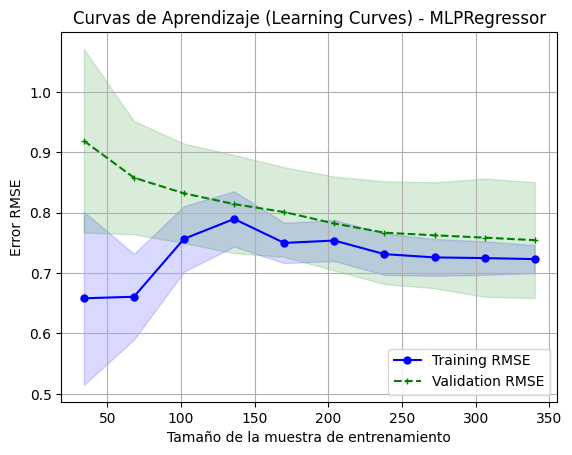

In [200]:
# Obtenido utilizando grid_search
best_params = {'m__activation': 'identity', 'm__alpha': 0.01, 'm__hidden_layer_sizes': 300,
                  'm__learning_rate': 'constant', 'm__solver': 'lbfgs'}
# Corrigiendo los nombres de los parametros
MLP_best_params = {key.replace('m__',''): valor for key in best_params.keys() for valor in best_params.values() if best_params[key] == valor}
MLP_best_score = -0.576871627343531

print("Best Parameters:", MLP_best_params)
print("Best Score:", MLP_best_score)

# Graficando curva de aprendizaje con el mejor modelo
MLP_model = MLPRegressor (random_state=1, shuffle=True, **MLP_best_params)
plotLearningCurve(MLP_model, Xtrainval, ytrainvallog, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

In [229]:
def RMSE(modelo, Xtrain, ytrain):
  # Obteniendo RMSE en datos de prueba
  mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', modelo)])
  mipipe.fit(pd.DataFrame(Xtrain, columns=Xtrain.columns), np.ravel(ytrain))
  yhattest_RF = mipipe.predict(Xtest)

  RMSE = np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF))
  #print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))
  print(f'Error RSME(Test) de {type(modelo).__name__}: {RMSE}')


# Imprime el RMSE de cada valor
modelos = [elmodelo_RF, XGB_model, SVM_model, MLP_model]

for modelo in modelos:
  RMSE(modelo, Xtrainval, ytrainvallog)

Error RSME(Test) de RandomForestRegressor: 0.6974977610724916
Error RSME(Test) de XGBRegressor: 0.6937377959462784
Error RSME(Test) de SVR: 0.7249229225761442
Error RSME(Test) de MLPRegressor: 0.733792849286716


## **Ejercicio 6**

### **Importancia de características**

#### **Ejercicio 6a.**

*   **Con base al mejor modelo encontrado, realiza una análisis de importancia de características con el conjunto de prueba (Test).**

*   **Obtener un diagrama de cajas o algún tipo de visualización para mostrar estos resultados.**


#### **Ejercicio 6b.**

*   **Con base a los gráficos obtenidos indica cuáles son los tres factores más importantes y que dan mayor información para la predicción de la variable de salida.**

*  **Compara tus resultados con el resultado de la Figura 6 del artículo de ELSEVIER. Indica tus coincidencias y diferencias.**

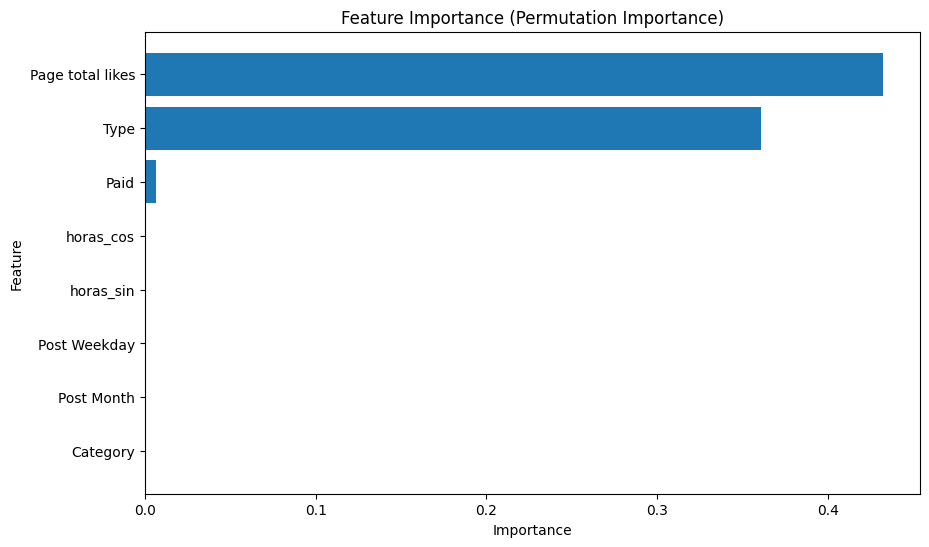

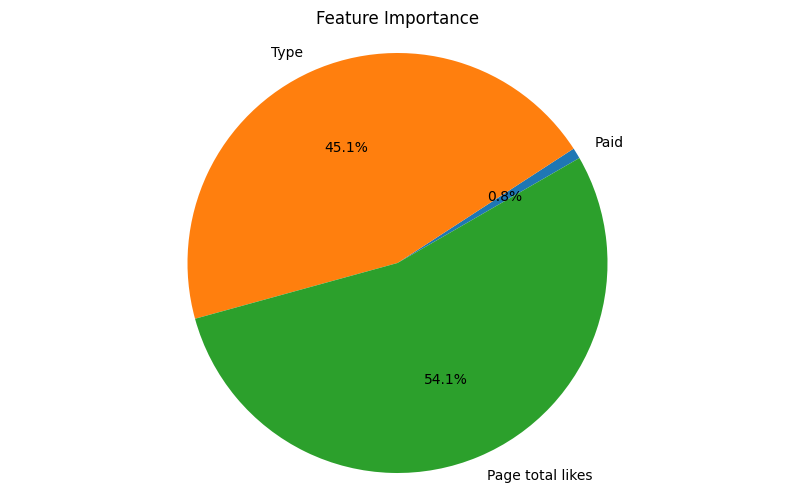

In [249]:
# ++++++++++++++ Incluye aquí tu código +++++++++++++++++++++++++++++++
# Ejercicio 6a.

from sklearn.inspection import permutation_importance

best_model_found = XGB_model # Este modelo es el que tiene menor valor de RMSE

pipe = Pipeline(steps=[('ct',columnasTransformer), ('m', best_model_found)])
pipe.fit(pd.DataFrame(Xtrainval, columns=Xtrainval.columns), np.ravel(ytrainvallog))

# Calcular la importancia de características por permutación
result = permutation_importance(pipe, Xtest, ytestlog, n_repeats=10, random_state=1)

# Crear un DataFrame para visualizar las importancias
perm_importances = pd.DataFrame({'feature': X.columns, 'importance': abs(result.importances_mean)})
perm_importances = perm_importances.sort_values(by='importance', ascending=True)
perm_importances["percentage"] = perm_importances["importance"]/perm_importances["importance"].sum()*100

# Visualizar la importancia por permutación
plt.figure(figsize=(10, 6))
plt.barh(perm_importances['feature'], perm_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Permutation Importance)')
plt.show()

# Create the pie plot.
df_selected_filtered = perm_importances[perm_importances['percentage'] >= 0.05]
plt.figure(figsize=(10, 6))
plt.pie(df_selected_filtered['percentage'],
        labels=df_selected_filtered['feature'],
        autopct='%1.1f%%',  # Format for displaying percentages
        startangle=30)

plt.title('Feature Importance')  # Add a title
plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.show()

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

In [250]:
perm_importances

,feature,importance,percentage
2,Category,0.000000,0.000000
3,Post Month,0.000000,0.000000
4,Post Weekday,0.000000,0.000000
6,horas_sin,0.000000,0.000000
7,horas_cos,0.000311,0.038954
5,Paid,0.006654,0.832323
1,Type,0.360531,45.094721
0,Page total likes,0.432000,54.034003


### **Ejercicio 6b**

Los errores RMSE obtenidos de los modelos anteriores serían los siguientes:

*   Error RSME(Test) de RandomForestRegressor: 0.6974977610724916
*   Error RSME(Test) de XGBRegressor: 0.6937377959462784
*   Error RSME(Test) de SVR: 0.7249229225761442
*   Error RSME(Test) de MLPRegressor: 0.733792849286716

De acuerdo con los erorres obtenidos y los scores presentados en las curvas de aprendizaje concluimos que el mejor modelo y con menor error, es el "XGB_model".

Realizando un análisis de importancia de características en el modelo más robusto, concluimos que las siguientes variables son las que tienen más peso en el modelo de mayor a menor:

1.   **Page total likes: 54.1%**
2.   **Type: 45.1%**
3.   **Paid: 0.8%**


Comparando con la figura 6 del artículo de observamos que las 2 categorías más altas coinciden, cambiando en los porcentajes siendo los siguientes:

1.   **Type: 36%**
2.   **Page total likes: 17%**
3.   **Month: 15%**
4.   **Category: 10%**
5.   **Hour: 8%**
6.   **Paid: 7%**
7.   **Weekday: 7%**


Desafortunadamente el modelo actual no destacó las otras características, y la tercera característica "Paid" obtuvo el último lugar conforme a la clasificación con el artículo.




## **Ejercicio 7**

### **Incluye tus conclusiones finales de la Actividad.**

De acuerdo con los resultados el mejor modelo es el XGBoost por su baja utilización de recursos a comparación de los otros modelos. Iguaslmente, es el modelo que tuvo un menor RMSE score.

En cuanto a las curvas de aprendizaje, pudimos comprobar que los errores RMSE evaluados en todos los modelos eran menores a los obtenidos con el "Desv_Est y_logaritmo=0.916". Asímismo estos diagramas son muy útiles para poder identificar el overfitting (Alta vavrianza) y el underfitting (alto sesgo).

El underfitting lo podemos identificar por un alto error RMSE tanto en los datos de entrenamiento como de validación. Algunas alternativas para arreglar esto, es incrementar la complejidad del modelo, añadir mejores características o reducir la regularización.

En contraparte el overfitting lo podemos identificar cuando el error en los datos de entrenamiento es muy bajo, pero en los datos de validación o prueba es mucho más alto. Esto significa que hay una gran diferencia entre las curvas de error y que el modelo actua bien en el conjunto de entrenamiento y mal en el de validación. En estos casos podemos optar por un modelo más simplificado y verificar que no haya datos que estén causando ruidos.

Una curva de aprendizaje buena debe de tener un error bajo tanto para los datos de entrenamiento como para los datos de validación, debe de tener una convergencia priorizando un bajo error y con la menor cantidad de datos posibles y que la curva de error datos de entrenamiento y validación sea muy cercana y paralela.

>> **Fin de la Actividad de la Semana 7**